Importing library, loading data file and checking for null values

In [53]:
import pandas as pd

In [54]:
df_sales = pd.read_csv('C:/Users/galea/Downloads/2022/Dissertation/Dissertation/Data/Derma_Sales_Data.csv', delimiter=',', header='infer', encoding='latin-1')

After the data is loaded, the first 5 records are printed.

In [55]:
df_sales.head(5)

,Data entry date,Pharmacy,Year,Month,Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Sales Rep,Code,Location
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,blank,NW,4
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,blank,NW,4
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,blank,HA,5
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,blank,HA,5
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,Rachel,PE,2


Here we check for null values, get the totals for nulls according to columns, and print the results of null values

In [56]:
df_sales.isnull().sum()

Data entry date        0
Pharmacy               0
Year                   0
Month                  0
Quarter                0
Product                0
Qty                    0
Cust.Name          10390
Comp.Name          10390
Area Code              0
Sales Rep              0
Code                  43
Location               0
dtype: int64

In [57]:
df_sales[df_sales.isnull().any(axis=1)]

,Data entry date,Pharmacy,Year,Month,Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Sales Rep,Code,Location
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,blank,HA,5
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,blank,HA,5
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,Rachel,PE,2
8,19/10/2018,Church Pharmacy,2015,Dec-15,15-Q4,Aliaxin EV,1,NaN,NaN,NW3,blank,NW,4
9,19/10/2018,Church Pharmacy,2015,Dec-15,15-Q4,Aliaxin FL,1,NaN,NaN,SR3,Heather,SR,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68300,13/05/2022,John Bannon - Ireland,2022,Mar-22,22-Q1,Profhilo,18,Cosaint Skincare Ireland Ltd,Cosaint Skincare Ireland Ltd,0,blank,NaN,0
68308,13/05/2022,John Bannon - Ireland,2022,Mar-22,22-Q1,Profhilo,8,Eos Clinic (Skin Cosmetic Clinic),Eos Clinic (Skin Cosmetic Clinic),0,blank,NaN,0
68316,13/05/2022,John Bannon - Ireland,2022,Mar-22,22-Q1,Profhilo,2,Nicola Fagan,Nicola Fagan,0,blank,NaN,0
68317,13/05/2022,John Bannon - Ireland,2022,Mar-22,22-Q1,Profhilo,2,Chloe Hughes,Chloe Hughes,0,blank,NaN,0


Sales Rep column is not needed in this research, so we drop the column in the notebook only

In [58]:
df_sales.drop('Sales Rep', axis=1, inplace=True)

In [59]:
df_sales.head(5)

,Data entry date,Pharmacy,Year,Month,Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,5
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,5
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,2


Here we need to create a new column which will store in it the month from the old month column

In [60]:
#df_sales['Date']= pd.to_datetime(df_sales['Month'], errors='ignore', format='%d%m%Y')
new = df_sales["Month"].str.split("-", n = 1, expand = True)
df_sales["NewMonth"]= new[0]
 
df_sales.rename(columns = {'Month':'Month-Year'}, inplace = True)
df_sales.rename(columns = {'NewMonth':'Month'}, inplace = True)
df_sales.head(5)

,Data entry date,Pharmacy,Year,Month-Year,Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4,Nov
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4,Nov
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,5,Nov
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,5,Nov
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,2,Nov


Here we get the unique values of the Month column to confirm that the months are correct. After we replace the month with a number instead of text.

In [61]:
print(df_sales['Month'].unique())

['Nov' 'Dec' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct']


In [62]:
df_sales['Month'].replace(to_replace = "Jan", 
                 value = 1, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Feb", 
                 value = 2, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Mar", 
                 value = 3, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Apr", 
                 value = 4, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "May", 
                 value = 5, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Jun", 
                 value = 6, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Jul", 
                 value = 7, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Aug", 
                 value = 8, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Sep", 
                 value = 9, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Oct", 
                 value = 10, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Nov", 
                 value = 11, 
                  inplace = True)
df_sales['Month'].replace(to_replace = "Dec", 
                 value = 12, 
                  inplace = True)

A new column needs to be added to hold the full date of sale using the Month and Year column

In [63]:
df_sales =  df_sales.astype({'Year':'str'})
df_sales =  df_sales.astype({'Month':'str'})
df_sales['Date']= "1" + '-' + df_sales['Month'] + '-' + df_sales['Year']
df_sales.head()

,Data entry date,Pharmacy,Year,Month-Year,Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month,Date
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4,11,1-11-2015
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4,11,1-11-2015
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,5,11,1-11-2015
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,5,11,1-11-2015
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,2,11,1-11-2015


Here we need to create a new column which will store in it the quarter from the old quarter column

In [64]:
new = df_sales["Quarter"].str.split("-", n = 1, expand = True)
df_sales["NewQuarter"]= new[1]
 
df_sales.rename(columns = {'Quarter':'Year-Quarter'}, inplace = True)
df_sales.rename(columns = {'NewQuarter':'Quarter'}, inplace = True)
df_sales.head(5)

,Data entry date,Pharmacy,Year,Month-Year,Year-Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month,Date,Quarter
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4,11,1-11-2015,Q4
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,4,11,1-11-2015,Q4
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,5,11,1-11-2015,Q4
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,5,11,1-11-2015,Q4
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,2,11,1-11-2015,Q4


Here, the unique location codes are found, for each number, we replace the code with the real location

In [65]:
print(df_sales['Location'].unique())

[4 5 2 1 3 7 8 6 0 9]


In [66]:
df_sales['Location'].replace(to_replace = 0, 
                 value = "Brazil, USA, Blank, IE, Zimbabwe, Zurich", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 1, 
                 value = "Scotland, Newcastle", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 2, 
                 value = "NorthEast, Midlands", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 3, 
                 value = "NorthWest", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 4, 
                 value = "London", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 5, 
                 value = "Outside London M25", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 6, 
                 value = "Outside London the rest", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 7, 
                 value = "SouthEast", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 8, 
                 value = "SouthWest", 
                  inplace = True)
df_sales['Location'].replace(to_replace = 9, 
                 value = "Ireland & Northern Ireland", 
                  inplace = True)
df_sales.head()

,Data entry date,Pharmacy,Year,Month-Year,Year-Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month,Date,Quarter
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,"NorthEast, Midlands",11,1-11-2015,Q4


In [67]:
df_sales.head()

,Data entry date,Pharmacy,Year,Month-Year,Year-Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month,Date,Quarter
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Viscoderm Trio,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin EV,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Aliaxin FL,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Viscoderm Trio,4,NaN,NaN,PE21,PE,"NorthEast, Midlands",11,1-11-2015,Q4


The unique product names are found, replaced with a generic name and assigned a category

In [68]:
print(df_sales['Product'].unique())

['Viscoderm Trio' 'Aliaxin EV' 'Aliaxin FL' 'Aliaxin GP' 'Aliaxin SR'
 'Viscoderm Skinko E' 'Viscoderm Skinko Kit' 'Viscoderm Cover Up Light'
 'Viscoderm Hydrogel Patch' 'Viscoderm Bi' 'Viscoderm Maxx' 'Profhilo'
 'Viscoderm Skinko' 'Viscoderm Cover Up Dark' 'Viscoderm Cover Up light'
 'Viscoderm Pearls' 'Viscoderm SPF 50' 'Viscoderm Cream'
 'Profhilo Haenkenium' 'Viscoderm Hydrobooster' 'Hydrobooster Needle Box'
 'Viscoderm' 'Aliaxin SV' 'ALIAXIN EV' 'ALIAXIN FL' 'ALIAXIN SR'
 'Aliaxin LV' 'Profhilo Cream' 'Profhilo Pura'
 'Viscoderm Hydrobooster Cream' 'Profhilo Body Kit']


In [69]:
df_sales['Product'].replace(to_replace =["Aliaxin EV", "ALIAXIN EV"], 
                 value = "Injection 1", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Aliaxin FL", "ALIAXIN FL"], 
                 value = "Injection 2", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Aliaxin GP"], 
                 value = "Injection 3", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Aliaxin LV"], 
                 value = "Injection 4", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Aliaxin SR", "ALIAXIN SR"], 
                 value = "Injection 5", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Aliaxin SV"], 
                 value = "Injection 6", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Hydrobooster Needle Box"], 
                 value = "Skin Booster Needles", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Profhilo"], 
                 value = "Injection 7", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Profhilo Body Kit"], 
                 value = "Injection 8", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Profhilo Cream"], 
                 value = "Cream 1", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Profhilo Haenkenium"], 
                 value = "Cream 2", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Profhilo Pura"], 
                 value = "Make-up Remover", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm", "Viscoderm Bi"], 
                 value = "Injection 9", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Cover Up Dark"], 
                 value = "Foundation 1", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Cover Up Light", "Viscoderm Cover Up light"], 
                 value = "Foundation 2", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Cream"], 
                 value = "Cream 3", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Hydrobooster"], 
                 value = "Injection 10", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Hydrobooster Cream"], 
                 value = "Cream 4", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Hydrogel Patch"], 
                 value = "Facemask", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Maxx"], 
                 value = "Injection 11", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Pearls"], 
                 value = "Pills", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Skinko"], 
                 value = "Injection 12", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Skinko E"], 
                 value = "Injection 13", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Skinko Kit"], 
                 value = "Mesotherapy Needles", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm SPF 50"], 
                 value = "sunblock", 
                  inplace = True)
df_sales['Product'].replace(to_replace =["Viscoderm Trio"], 
                 value = "Injection 14", 
                  inplace = True)


In [70]:
df_sales.head(50)

,Data entry date,Pharmacy,Year,Month-Year,Year-Quarter,Product,Qty,Cust.Name,Comp.Name,Area Code,Code,Location,Month,Date,Quarter
0,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Injection 14,2,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4
1,23/06/2019,Direct Sales,2015,Nov-15,15-Q4,Injection 14,1,Dr Josevania Martins,Dr Vania Healthcare,NW3,NW,London,11,1-11-2015,Q4
2,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Injection 1,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4
3,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Injection 2,1,NaN,NaN,HA8,HA,Outside London M25,11,1-11-2015,Q4
4,19/10/2018,Church Pharmacy,2015,Nov-15,15-Q4,Injection 14,4,NaN,NaN,PE21,PE,"NorthEast, Midlands",11,1-11-2015,Q4
5,23/06/2019,Direct Sales,2015,Dec-15,15-Q4,Injection 3,8,Dr Andrew Culbard,Dr Andrew Culbard,G12,G,"Scotland, Newcastle",12,1-12-2015,Q4
6,23/06/2019,Direct Sales,2015,Dec-15,15-Q4,Injection 2,4,Dr Andrew Culbard,Dr Andrew Culbard,G12,G,"Scotland, Newcastle",12,1-12-2015,Q4
7,23/06/2019,Direct Sales,2015,Dec-15,15-Q4,Injection 1,8,Dr Andrew Culbard,Dr Andrew Culbard,G12,G,"Scotland, Newcastle",12,1-12-2015,Q4
8,19/10/2018,Church Pharmacy,2015,Dec-15,15-Q4,Injection 1,1,NaN,NaN,NW3,NW,London,12,1-12-2015,Q4
9,19/10/2018,Church Pharmacy,2015,Dec-15,15-Q4,Injection 2,1,NaN,NaN,SR3,SR,"Scotland, Newcastle",12,1-12-2015,Q4


The unique customer names are found, stored in a csv and renamed with a generic name

In [134]:
df_sales['Cust.Name'] = df_sales['Cust.Name'].str.lower()
df_sales['Cust.Name'] = df_sales['Cust.Name'].str.title()
print(df_sales['Cust.Name'].unique())
custName = df_sales['Cust.Name'].unique()

['Dr Josevania Martins' nan 'Dr Andrew Culbard' ... 'Dr Sunita De Zoysa'
 'Pro Beauty Ltd' 'Dr Kiran Juneja']


In [135]:
dictOfWordsCust = { ("Customer "+ str(i+1)) : custName[i] for i in range(0, len(custName) ) }

In [136]:
import csv

headersCust = ["Customer Number", "Customer Name"]
with open('C:/Users/galea/Downloads/2022/Dissertation/Dissertation/Data/CustomerNames.csv', 'w', encoding="utf-8", newline='') as f:

# writing the data into the file
   writer = csv.writer(f)
   writer.writerow(headersCust)
   writer.writerows(dictOfWordsCust.items())

The unique company names are found, stored in a csv and renamed with a generic name

In [137]:
df_sales['Comp.Name'] = df_sales['Comp.Name'].str.lower()
df_sales['Comp.Name'] = df_sales['Comp.Name'].str.title()
print(df_sales['Comp.Name'].unique())
compName = df_sales['Comp.Name'].unique()

['Dr Vania Healthcare' nan 'Dr Andrew Culbard' ...
 'Symmetria Facial Aesthetics Ltd' 'Hunts Cross Dental Centre'
 'Pro Beauty Ltd']


In [138]:
dictOfWordsComp = { ("Company "+ str(i+1)) : compName[i] for i in range(0, len(compName) ) }

In [139]:
headersComp = ["Company Number", "Company Name"]
with open('C:/Users/galea/Downloads/2022/Dissertation/Dissertation/Data/CompanyNames.csv', 'w', encoding="utf-8", newline='') as f:

# writing the data into the file
   writer = csv.writer(f)
   writer.writerow(headersComp)
   writer.writerows(dictOfWordsComp.items())

In [140]:
df_sales['Pharmacy'] = df_sales['Pharmacy'].str.lower()
df_sales['Pharmacy'] = df_sales['Pharmacy'].str.title()
print(df_sales['Pharmacy'].unique())
pharmacyName = df_sales['Pharmacy'].unique()

['Direct Sales' 'Church Pharmacy' 'Intravita' 'Springpharm' 'Wigmore'
 'Millennium' 'Mediva' 'John Bannon - Ireland' 'Healthxchange Uk'
 'Healthxchange Ireland' 'John Bannon Uk']


In [142]:
dictOfWordsPharmacy = { ("Pharmacy "+ str(i+1)) : pharmacyName[i] for i in range(0, len(pharmacyName) ) }

In [143]:
headersPharmacy = ["Pharmacy Number", "Pharmacy Name"]
with open('C:/Users/galea/Downloads/2022/Dissertation/Dissertation/Data/PharmacyNames.csv', 'w', encoding="utf-8", newline='') as f:

# writing the data into the file
   writer = csv.writer(f)
   writer.writerow(headersPharmacy)
   writer.writerows(dictOfWordsPharmacy.items())

Text(0.5, 1.0, 'Location Count')

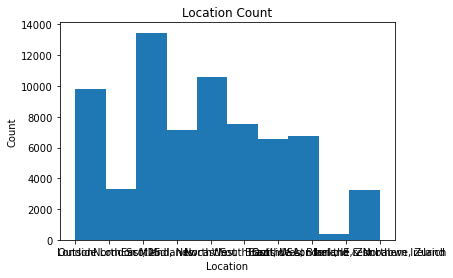

In [77]:
from matplotlib import pyplot as plt

plt.hist(df_sales.Location)
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Location Count")

['Year', 'Product', 'Location', 'Month', 'Date', 'Quarter']


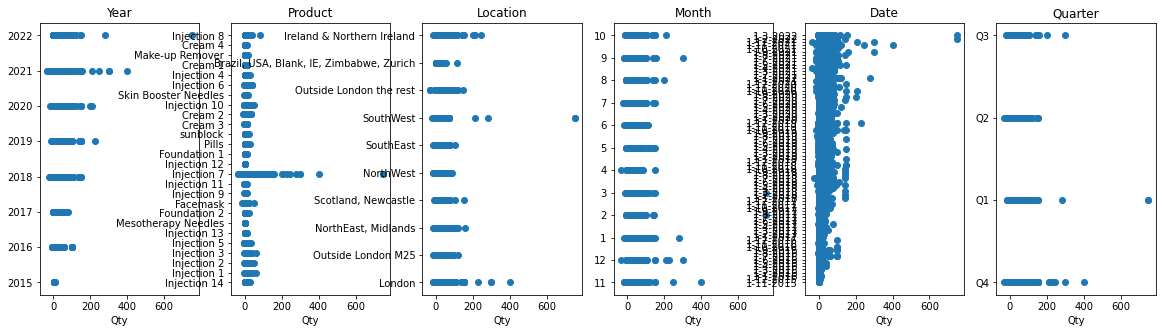

In [78]:
columns = list(df_sales.columns)

columns.remove('Data entry date')
columns.remove('Pharmacy')
columns.remove('Month-Year')
columns.remove('Year-Quarter')
columns.remove('Cust.Name')
columns.remove('Comp.Name')
columns.remove('Qty')
columns.remove('Area Code')
columns.remove('Code')
print(columns)

fig, ax = plt.subplots(1, len(columns), figsize = (20, 5))

for idx, col in enumerate(columns, 0):
    ax[idx].plot(df_sales['Qty'], df_sales[col], 'o')
    ax[idx].set_xlabel('Qty')
    ax[idx].set_title(col)

plt.show()